# Practical Methodology

As you may already know, there are different steps for implementing and applying a deep moodel to a dataset. The steps are as follows:

1.   Defining the problem
2.   Data collection
3.   Preparing data
4.   Choosing an appropriate model
5.   Train the model
6.   Evaluating the model

  *   Selecting a proper evaluation metric
  *   Picking a suitable train/test split

7.   Hyperparameter Tuning

  *   Such as: batch size, number of epochs, learning rate, and ...

8.   Making Predictions

In this assignment we would like to practice picking the most appropiate model and hyperparameters to solve a deep learning problem.

This assignment comes in 3 parts. So let's get to it.



In [1]:
#@title Run this cell to import all the required libraries

import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
import PIL

## Part 1

### Data Preparation

In this part of the assignment we will be using horse or human dataset, which consists of images of horses and humans. This dataset is gathered for a binary classificaition problem.

In [ ]:
# Training Data
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
# Validation Data
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip

--2021-05-15 11:37:18--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 74.125.137.128, 2607:f8b0:4023:c06::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.2’

horse-or-human.zip. 100%[===================>] 142.65M   259MB/s    in 0.5s    

2021-05-15 11:37:19 (259 MB/s) - ‘horse-or-human.zip.2’ saved [149574867/149574867]

--2021-05-15 11:37:19--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Leng

In [ ]:
# Get the Horse or Human dataset
path_horse_or_human = f"{getcwd()}/../content/horse-or-human.zip"
# Get the Horse or Human Validation dataset
path_validation_horse_or_human = f"{getcwd()}/../content/validation-horse-or-human.zip"
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile
import shutil

shutil.rmtree('/tmp')
local_zip = path_horse_or_human
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/training')
zip_ref.close()

local_zip = path_validation_horse_or_human
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/validation')
zip_ref.close()

In [ ]:
# Define our example directories and files
train_dir = '/content/training'
validation_dir = '/content/validation'

train_horses_dir = os.path.join(train_dir, 'horses')
print(train_horses_dir)
train_humans_dir = os.path.join(train_dir, 'humans')
validation_horses_dir = os.path.join(validation_dir, 'horses')
validation_humans_dir = os.path.join(validation_dir, 'humans')
train_horses_fnames = os.listdir(train_horses_dir)
train_humans_fnames = os.listdir(train_humans_dir)
validation_horses_fnames = os.listdir(validation_horses_dir)
validation_humans_fnames = os.listdir(validation_humans_dir)

print(len(train_horses_fnames))
print(len(train_humans_fnames))
print(len(validation_horses_fnames))
print(len(validation_humans_fnames))

# Expected Output:
# 500
# 527
# 128
# 128

/content/training/horses
500
527
128
128


When working with deep models you might find yourself in a situation where there are not enough data to train your model with. This is where Keras's ImageDataGenerator comes in. It helps you augment your image data in real time while your model is training.

Augmentation helps you with creating samples that differs from the original sample by shifting, shearing, rotating, and ... the original image. Thus increases the total number of your training samples.

This [link](https://keras.io/api/preprocessing/image/) gives you all the information you need for ImageDataGenerator.

In [ ]:
# Now create an ImageDataGenerator instance for your training samples
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# Now create an ImageDataGenerator instance for your testing samples
# Note that you shouldn't augment your test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Use flow_from_directory to flow training images in a batch of 30 using train_datagen
# Input shape is (150, 150, 3)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=30,
        class_mode='binary')

# Use flow_from_directory to flow test images in a batch of 30 using test_datagen
# Input shape is (150, 150, 3)
validation_generator =  validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=30,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### Defining your model

In this section we would like to define a model using the deep networks you have already learned in class. Defining a model with appropriate complexity  and number of layers is of great importance.

Below you should define your model. <font color='red'>Define 3 models with different number of layers, filter sizes, pooling layers and dimensions. </font>

In [ ]:
# Define your model below with functional API

''' Your Code '''
regularizer=keras.regularizers.l2(1e-4)
input1 = keras.Input(shape=train_generator.image_shape)
x1 = keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='elu', kernel_regularizer= regularizer)(input1)

x1 = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x1)
x1 = keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='elu', kernel_regularizer= regularizer)(x1)

x1 = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x1)
x1 = keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='elu', kernel_regularizer= regularizer)(x1)

x1 = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x1)
x1 = keras.layers.Flatten()(x1)
x1 = keras.layers.Dropout(0.4)(x1)
x1 = layers.Dense(32, activation='relu', kernel_regularizer= regularizer)(x1)
x1 = keras.layers.Dropout(0.4)(x1)
output1 = keras.layers.Dense(1, activation='sigmoid', kernel_regularizer= regularizer)(x1)

model_no1 = Model(input1, output1)

In [ ]:
# Define your model below with functional API

''' Your Code '''
regularizer=keras.regularizers.l2(1e-4)
input2 = keras.Input(shape=train_generator.image_shape)
x2 = keras.layers.Conv2D(filters=32, kernel_size=(7,7), activation='elu', kernel_regularizer= regularizer)(input2)

x2 = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x2)
x2 = keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='elu', kernel_regularizer= regularizer)(x2)

x2 = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x2)
x2 = keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='elu', kernel_regularizer= regularizer)(x2)

x2 = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x2)
x2 = keras.layers.Flatten()(x2)
x2 = keras.layers.Dropout(0.5)(x2)
x2 = layers.Dense(32, activation='relu', kernel_regularizer= regularizer)(x2)
x2 = keras.layers.Dropout(0.5)(x2)
output2 = keras.layers.Dense(1, activation='sigmoid', kernel_regularizer= regularizer)(x2)

model_no2 = Model(input2, output2)

In [ ]:
# Define your model below with functional API

''' Your Code '''
regularizer=keras.regularizers.l2(1e-4)
input3 = keras.Input(shape=train_generator.image_shape)
x3 = keras.layers.Conv2D(filters=32, kernel_size=(7,7), activation='elu', kernel_regularizer= regularizer)(input3)

x3 = keras.layers.MaxPool2D(pool_size=(2,2))(x3)
x3 = keras.layers.Conv2D(filters=32, kernel_size=(7,7), activation='elu', kernel_regularizer= regularizer)(x3)

x3 = keras.layers.MaxPool2D(pool_size=(2,2))(x3)
x3 = keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='elu', kernel_regularizer= regularizer)(x3)

x3 = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x3)
x3 = keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='elu', kernel_regularizer= regularizer)(x3)

x3 = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x3)
x3 = keras.layers.Flatten()(x3)
x3 = keras.layers.Dropout(0.5)(x3)
x3 = layers.Dense(16, activation='relu', kernel_regularizer= regularizer)(x3)
x3 = keras.layers.Dropout(0.25)(x3)
output3 = keras.layers.Dense(1, activation='sigmoid', kernel_regularizer= regularizer)(x3)

model_no3 = Model(input3, output3)

Now we would like our model to stop training right after it reaches a specified accuracy. This helps preventing the model from overfitting.

Define a custom callback using Keras's callbacks to stop training the model once it reaches 85% accuracy.

In [ ]:
ACCURACY_THRESHOLD = 0.85
class myCallback(tf.keras.callbacks.Callback):
    ''' Your Code '''
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('acc') > ACCURACY_THRESHOLD):   
          print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
          self.model.stop_training = True


Now it's time for compiling our models.

In [ ]:
# Choose the proper optimizer for your model (you should test your code with different optimizers and learning rates)

model_no1.compile(
    optimizer= keras.optimizers.Adam(),
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

model_no1.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 146, 146, 64)      4864      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 69, 69, 32)        51232     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 30, 30, 16)        12816     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 15, 15, 16)        0  

In [ ]:
# Choose the proper optimizer for your model (you should test your code with different optimizers and learning rates)

model_no2.compile(
    optimizer= keras.optimizers.Adam(),
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

model_no2.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 144, 144, 32)      4736      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 68, 68, 32)        25632     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 32, 32, 16)        4624      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 16, 16, 16)        0  

In [ ]:
# Choose the proper optimizer for your model (you should test your code with different optimizers and learning rates)

model_no3.compile(
    optimizer= keras.optimizers.Adam(),
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

model_no3.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 144, 144, 32)      4736      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 66, 66, 32)        50208     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 29, 29, 16)        12816     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 14, 14, 16)        0  

### Training Model

Now we can traing our model using our custom callback, train and test generators.

In [ ]:
callbacks = myCallback()
history_no1 = model_no1.fit(train_generator,
          epochs=100,
          
          validation_data=validation_generator,
          callbacks=callbacks)

Epoch 1/100
35/35 [==============================] - 83s 2s/step - loss: 0.7806 - acc: 0.5472 - val_loss: 0.6600 - val_acc: 0.5273
Epoch 2/100
35/35 [==============================] - 83s 2s/step - loss: 0.5295 - acc: 0.7457 - val_loss: 0.8918 - val_acc: 0.7578
Epoch 3/100
35/35 [==============================] - 83s 2s/step - loss: 0.3892 - acc: 0.8210 - val_loss: 1.3779 - val_acc: 0.7891
Epoch 4/100
35/35 [==============================] - 82s 2s/step - loss: 0.2390 - acc: 0.9106 - val_loss: 1.9697 - val_acc: 0.8086

Reached 85.00% accuracy, so stopping training!!


In [ ]:
callbacks = myCallback()
history_no2 = model_no2.fit(train_generator,
          epochs=100,

          validation_data=validation_generator,
          callbacks=callbacks)

Epoch 1/100
35/35 [==============================] - 57s 2s/step - loss: 0.7291 - acc: 0.5473 - val_loss: 0.4887 - val_acc: 0.8242
Epoch 2/100
35/35 [==============================] - 57s 2s/step - loss: 0.4122 - acc: 0.8117 - val_loss: 1.0151 - val_acc: 0.8320
Epoch 3/100
35/35 [==============================] - 57s 2s/step - loss: 0.4634 - acc: 0.8150 - val_loss: 1.0458 - val_acc: 0.8281
Epoch 4/100
35/35 [==============================] - 57s 2s/step - loss: 0.2428 - acc: 0.9140 - val_loss: 1.3382 - val_acc: 0.8008

Reached 85.00% accuracy, so stopping training!!


In [ ]:
callbacks = myCallback()
history_no3 = model_no3.fit(train_generator,
          epochs=100,

          validation_data=validation_generator,
          callbacks=callbacks)

Epoch 1/100
35/35 [==============================] - 76s 2s/step - loss: 0.7120 - acc: 0.5616 - val_loss: 0.4977 - val_acc: 0.7188
Epoch 2/100
35/35 [==============================] - 76s 2s/step - loss: 0.4751 - acc: 0.7620 - val_loss: 0.4870 - val_acc: 0.8086
Epoch 3/100
35/35 [==============================] - 75s 2s/step - loss: 0.3810 - acc: 0.8136 - val_loss: 0.8642 - val_acc: 0.8008

Reached 85.00% accuracy, so stopping training!!


Now it's time for plotting the training loss and accuracy of our 3 models using their histories.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

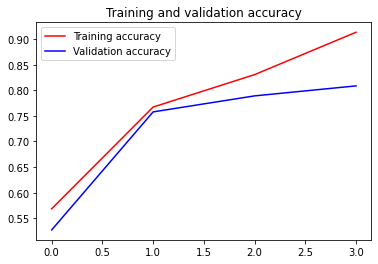

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history_no1.history['acc']
val_acc = history_no1.history['val_acc']
loss = history_no1.history['loss']
val_loss = history_no1.history['val_loss']

epochs = history_no1.epoch

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

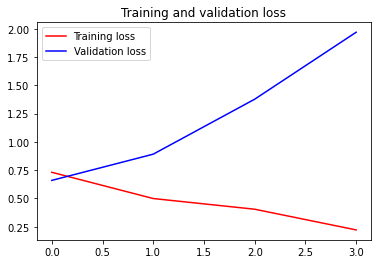

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

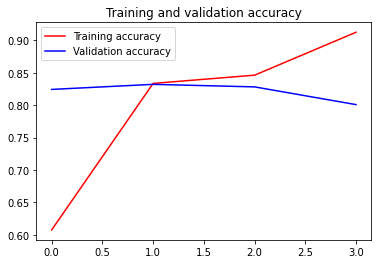

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history_no2.history['acc']
val_acc = history_no2.history['val_acc']
loss = history_no2.history['loss']
val_loss = history_no2.history['val_loss']

epochs = history_no2.epoch

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

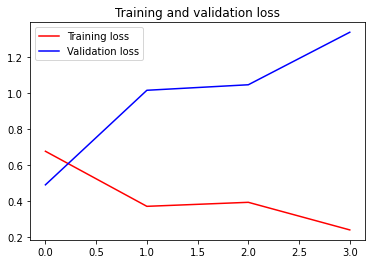

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

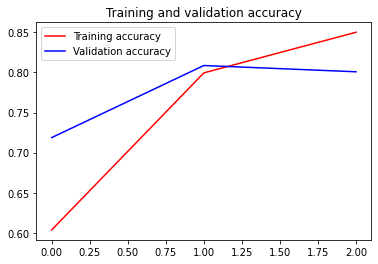

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history_no3.history['acc']
val_acc = history_no3.history['val_acc']
loss = history_no3.history['loss']
val_loss = history_no3.history['val_loss']

epochs = history_no3.epoch

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

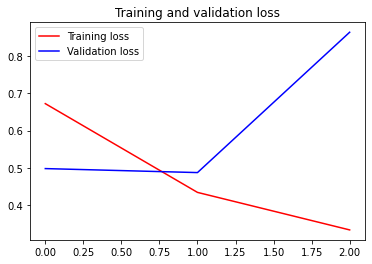

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

<font color='red'>Now compare and analyze the models. Please write your answers in the following cell.</font>

I think it is not good to use Early stopping with accuracy of 85 on this models beacuse their execution ends soon and may we should chose a higher value for accuracy but as it is clear from plots all models are good on  loss and accuracy of training but for validation data only accuracy improves during epochs

## Part 2

There are two ways to optimize your hyperparameters. The first one would be testing different hyperparameter values and see which values lead to the best performance. The second method is finding the best hyperparameters automatically by using algorithms such as grid search.

In this part we would like to explore these two methods.

### Manual Hyperparameter tuning

#### Preparing Data

It's Spring and it would be a great idea to train a model to identify different flowers :)

The dataset we'll be using for this part would be the flower dataset. Now the first step is to download the images. Run the cell below to download the images.

In [2]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 3s 0us/step


Now let us see some beautiful flowers.

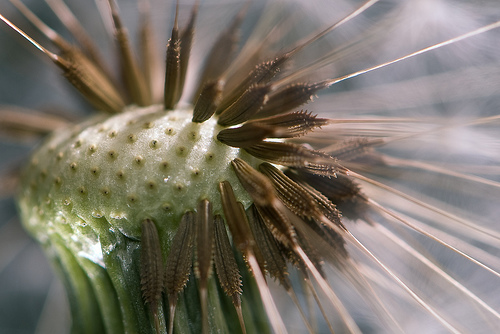

In [3]:
dandelion = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dandelion[4]))

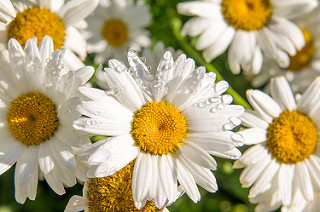

In [4]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[2]))

Now that we have seen some of the images, we would want to create a dataset. To create a dataset we want to have a train and a test set.

In [5]:
# Defining some parameters for our data

batch_size = 32
img_height = 180
img_width = 180

Now use image_dataset_from_directory to create datasets for validation and traning. Use a 0.2 split ratio for both. You also need to use the parameters defined in the cell above to create the datasets.

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


As you've seen by running the cell above, our dataset contains 5 classes. The classes are as follows:

In [8]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In the following cell you should complete the function to normalize your dataset.

In [9]:
def process(image, label):
  # pixels = np.asarray(image)
  # pixels = pixels.astype('float32')
  image /= 255.0
  return image, label

In [10]:
train_ds = train_ds.map(process).cache().shuffle(10000)
val_ds = val_ds.map(process).cache()

#### Create Model

Now we would like to build our model. We will be using VGG blocks for our model. <font color='red'>Please create a model with batch nomralization layer and another model without batch normalization and compare the results.</font>

In [ ]:
def vgg_block(model_input, num_filters, num_conv_layers):
  # You should use your batch normalization layer here
  ''' Your Code '''
  for _ in range(num_conv_layers):

    model_input = keras.layers.Conv2D(num_filters, (3,3), padding='same')(model_input)
    model_input = keras.layers.BatchNormalization()(model_input)
    model_input = keras.layers.Activation('relu')(model_input)
  block_output = keras.layers.MaxPooling2D((2,2), strides=(2,2))(model_input)
  
  return block_output

input = layers.Input(shape=(img_height, img_width, 3))
block = vgg_block(input, 64, 2)
# Now we need to prepare the output of our block for the dense layers
out = keras.layers.Flatten()(block)
# dropout1 = keras.layers.Dropout(0.25)(out)
dense_out = keras.layers.Dense(16)(out)
dense_out_bn = keras.layers.BatchNormalization()(dense_out)
dense_out_act = keras.layers.Activation('relu')(dense_out_bn)
# dropout2 = keras.layers.Dropout(0.5)(dense_out_act)

final_out = keras.layers.Dense(5, activation='softmax')(dense_out_act)
model_bn = Model(inputs=input, outputs=final_out)

In [ ]:
# Compile the model here

model_bn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_bn.summary()

Model: "model_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_45 (InputLayer)        [(None, 180, 180, 3)]     0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 180, 180, 64)      1792      
_________________________________________________________________
batch_normalization_99 (Batc (None, 180, 180, 64)      256       
_________________________________________________________________
activation_71 (Activation)   (None, 180, 180, 64)      0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 180, 180, 64)      36928     
_________________________________________________________________
batch_normalization_100 (Bat (None, 180, 180, 64)      256       
_________________________________________________________________
activation_72 (Activation)   (None, 180, 180, 64)      0  

In [ ]:
epochs=10
history_bn = model_bn.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 23s 242ms/step - loss: 1.3390 - accuracy: 0.4247 - val_loss: 1.6572 - val_accuracy: 0.2534
Epoch 2/10
92/92 [==============================] - 22s 241ms/step - loss: 1.0174 - accuracy: 0.6132 - val_loss: 1.9058 - val_accuracy: 0.2493
Epoch 3/10
92/92 [==============================] - 22s 241ms/step - loss: 0.8371 - accuracy: 0.6929 - val_loss: 2.0029 - val_accuracy: 0.2629
Epoch 4/10
92/92 [==============================] - 22s 242ms/step - loss: 0.6116 - accuracy: 0.8184 - val_loss: 1.9741 - val_accuracy: 0.2793
Epoch 5/10
92/92 [==============================] - 22s 241ms/step - loss: 0.3606 - accuracy: 0.9200 - val_loss: 1.4098 - val_accuracy: 0.4332
Epoch 6/10
92/92 [==============================] - 22s 242ms/step - loss: 0.2027 - accuracy: 0.9767 - val_loss: 1.2084 - val_accuracy: 0.5368
Epoch 7/10
92/92 [==============================] - 22s 243ms/step - loss: 0.1019 - accuracy: 0.9937 - val_loss: 1.1848 - val_accuracy: 0.5695

In [ ]:
def vgg_block(model_input, num_filters, num_conv_layers):
  # In this block do not use batch normalization
  ''' Your Code '''
  for _ in range(num_conv_layers):

    model_input = keras.layers.Conv2D(num_filters, (3,3), padding='same', activation='relu')(model_input)

	
  block_output = keras.layers.MaxPooling2D((2,2), strides=(2,2))(model_input)

  return block_output

input = layers.Input(shape=(img_height, img_width, 3))
block = vgg_block(input, 64, 2)
# Now we need to prepare the output of our block for the dense layers
out = keras.layers.Flatten()(block)

dense_out = keras.layers.Dense(16, activation='relu')(out)


final_out = keras.layers.Dense(5, activation='softmax')(dense_out)
model = Model(inputs=input, outputs=final_out)

In [ ]:
# Compile the model here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "model_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_47 (InputLayer)        [(None, 180, 180, 3)]     0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 180, 180, 64)      1792      
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 180, 180, 64)      36928     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 90, 90, 64)        0         
_________________________________________________________________
flatten_44 (Flatten)         (None, 518400)            0         
_________________________________________________________________
dense_85 (Dense)             (None, 16)                8294416   
_________________________________________________________________
dense_86 (Dense)             (None, 5)                 85 

#### Training

Now let's train our model.

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 18s 186ms/step - loss: 3.0186 - accuracy: 0.2895 - val_loss: 1.4292 - val_accuracy: 0.4155
Epoch 2/10
92/92 [==============================] - 17s 183ms/step - loss: 1.3797 - accuracy: 0.4231 - val_loss: 1.3839 - val_accuracy: 0.4196
Epoch 3/10
92/92 [==============================] - 17s 184ms/step - loss: 1.2945 - accuracy: 0.4674 - val_loss: 1.3232 - val_accuracy: 0.5014
Epoch 4/10
92/92 [==============================] - 17s 185ms/step - loss: 1.0296 - accuracy: 0.6155 - val_loss: 1.2828 - val_accuracy: 0.5300
Epoch 5/10
92/92 [==============================] - 17s 185ms/step - loss: 0.6764 - accuracy: 0.7724 - val_loss: 1.4886 - val_accuracy: 0.5082
Epoch 6/10
92/92 [==============================] - 17s 185ms/step - loss: 0.4419 - accuracy: 0.8690 - val_loss: 1.5321 - val_accuracy: 0.5436
Epoch 7/10
92/92 [==============================] - 17s 185ms/step - loss: 0.2444 - accuracy: 0.9306 - val_loss: 2.0846 - val_accuracy: 0.5163

Visualizing training loss and accuracy

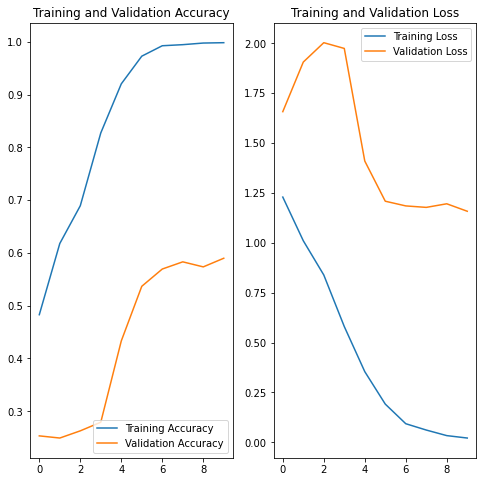

In [ ]:
acc = history_bn.history['accuracy']
val_acc = history_bn.history['val_accuracy']

loss = history_bn.history['loss']
val_loss = history_bn.history['val_loss']

epochs_range = history_bn.epoch

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

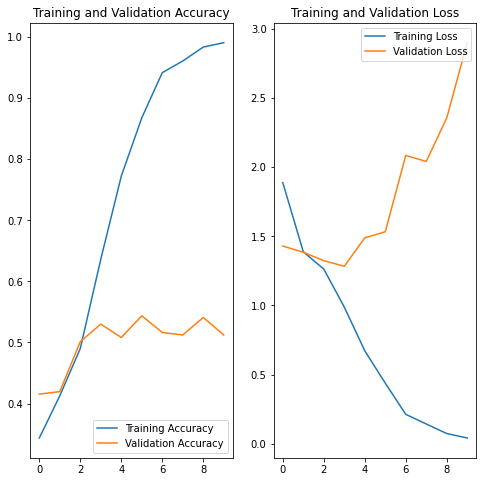

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = history.epoch

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Now based on the plots analyze the results and write your answers in the cell below.

<font color='red'>model has opverfit problem aplying dropout could help it to be better and I applyed that but  since in model properities was fixed I'd ratter to not change them. batch normalization  had a littled improvement on accuracy about 7 or 8 precent and it caused loss to be more stable and and decrease over epochs</font>

### Automatic Hyperparameter Tuning


Now we would like to use keras's Hyperparameter class to be able to use algorithms such as HyperBand to optimize our hyperparameters.

We can build a hyper model using 2 methods:


1.   Subclassing HyperModel
2.   Using a model builder function

In this assignment we aim to use the second option.

Using hyperparameter optimizer can also give us the best models (number of layers, hidden sizes, and ...)

#### Creating the Model

Now all we need to do is to create a building model function to be able to use the hyperparameter instance. To read further into HyperParameters class please feel free to take a look at Keras's official [documentation](https://keras-team.github.io/keras-tuner/documentation/hyperparameters/)

In [11]:
def build_model(hp):
  # hp is the hyperparameter instance with which you can sample your hyperparameters
  # such as hp.Choice
  inputs = layers.Input(shape=(img_height, img_height, 3))
  x = inputs
  # Now use the hp instance to choose the range of your convolution blocks.
  # There should be minimum 1 block and max 3 blocks.
  # Each block is a VGG block (like the previous part) and you should use hp.Int
  # to select your filter sizes. The step size for the range should be 32.
  # Instead of using max pooling at the end of each block you should use hp.Choice to
  # choose between max or average pooling
  # Also remember to give names to hp samples (please choose proper names)
  ''' Your Code '''
  for i in range(hp.Int('blocks', 1, 3)):
    x = layers.Conv2D(filters=hp.Int('filters_' + str(i), 32, 100, step=32), kernel_size=(3,3), activation='relu' )(x)
  if hp.Choice('pooling_' + str(i), ['avg', 'max']) == 'max':
      x = tf.keras.layers.MaxPool2D()(x)
  else:
      x = tf.keras.layers.AvgPool2D()(x)

  # Now you should prepare your block's output for the next dense layers
  ''' Your Code '''
  x = layers.Flatten()(x)
  # We are all ready to sample our dense layers. Please add a dense layer to our
  # model but remember that your dense layer's hidden size should be an hp sample
  # so our HyperBand algorithm finds the best possible hidden size for our model
  x = tf.keras.layers.Dense(units=hp.Int('units_' + str(i), 32, 100, step=32, default=50), activation='relu')(x)
  # Do the same with the dropout layer. Use hp.Float
  x = tf.keras.layers.Dropout(
      hp.Float('dropout', 0, 0.5, step=0.1, default=0.5))(x)
  outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

  model = tf.keras.Model(inputs, outputs)
  # Now we have to use hp to sample our learning rate
  model.compile(
    optimizer=tf.keras.optimizers.Adam(
      learning_rate = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log'
 
)),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])
  return model

Run the cell below to install kerastuner

In [12]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 71kB 8.5MB/s 


The cell below creates an instance of kerastuner. We will call it tuner.

In [13]:
import kerastuner as kt

tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    hyperband_iterations=2)

Hyperparameter search is done by the cell below. The search method has got the same signature as keras.Model.fit.

In [14]:
tuner.search(train_ds,
             validation_data=val_ds,
             epochs=10,
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)])

Trial 60 Complete [00h 01m 07s]
val_accuracy: 0.5953678488731384

Best val_accuracy So Far: 0.6239781975746155
Total elapsed time: 00h 31m 05s
INFO:tensorflow:Oracle triggered exit


Each model will train for 30 epochs and 2 iterations of the Hyperband algorithm will be run. You can retrieve the best models found by calling get_best_models:

In [15]:
best_model = tuner.get_best_models(1)[0]

get_best_hyperparameters gives us the best values for our hyperparameters.

In [16]:
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]

## Part 3

Well good job on completing the previous parts. By the time you reach this part. You have become familiar with batch normalization and hyperparameter tuning. In this section we would like to dive more deeply into these concepts.

### Hyperparameter tuning algorithms

Please Name a couple of hyperparameter tuning algorithms. Explain 2 of them and state the pros and cons of each.

<font color='red'>Grid search, Random search, Bayesian optimization, Gradient-based optimization, Evolutionary optimization, Population-based, Early stopping-based
<br/>
<br/>
Grid search:
<br/>
The search space of each hyper-parameter is discretized, and the total search space is discretized as the Cartesian products of them. Then, the algorithm launches a learning for each of the hyper-parameter configurations, and selects the best at the end. It is an embarrassingly parallel problem (provided one has the computing power needed to train several models at the same time) but suffers from the curse of dimensionality (the number of configurations to try is exponential with regards to the number of hyper-parameters to be optimized).
<br/>
<br/>
Random search:
<br/>
A variation of the Grid search, which randomly samples the search space instead of discretizing it with a Cartesian grid. The algorithm has no end. Instead a time budget has to be specified (in other words, a number of trials). This algorithm suffers likewise from the curse of dimensionality to reach a preset fixed sampling density. One of the advantages of random search is that if two hyper-parameters are little correlated, random search enables to find more precisely the optima of each parameter.Random search has proven to be particularly effective, especially if the search space is not cubic, i.e. if some hyper-parameters are given a much greater range of variation than others. 
<br/>
<br/>
Random search and grid search are an attractive first option for optimization. They are very easy to code, can be run in parallel and they do not need any form of tuning. Their drawback is that there is no guarantee of finding a local minimum to some precision except if the search space is thoroughly sampled. This does not pose any problem if the model is very fast to run and the number of hyper-parameters is low. If the model takes a significant time to run using a lot of computational resources, random or grid search are inefficient as they do not use the information gained by all the previous tries.
</font>

### Batch Normalization

What is batch normalization and why is it used? What are the benefits of using batch normalization?

<font color='red'>Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.</font>

This is the end of Assignment 08. Hope you've learned new stuff. Good Luck :)